In [4]:
import pandas as pd

df=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [6]:
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
# For categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-6-503c16d4072b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-503c16d4072b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   4998 non-null   object 
 2   Location               4998 non-null   object 
 3   Operator               4998 non-null   object 
 4   Flight #               4998 non-null   object 
 5   Route                  4998 non-null   object 
 6   AC Type                4998 non-null   object 
 7   Registration           4998 non-null   object 
 8   cn/ln                  4998 non-null   object 
 9   Aboard                 4998 non-null   float64
 10  Aboard Passangers      4998 non-null   float64
 11  Aboard Crew            4998 non-null   float64
 12  Fatalities             4998 non-null   float64
 13  Fatalities Passangers  4998 non-null   float64
 14  Fatalities Crew        4998 non-null   float64
 15  Grou

Total Crashes: 4998
Total Fatalities: 111732.0
Survival Rate: 28.21%


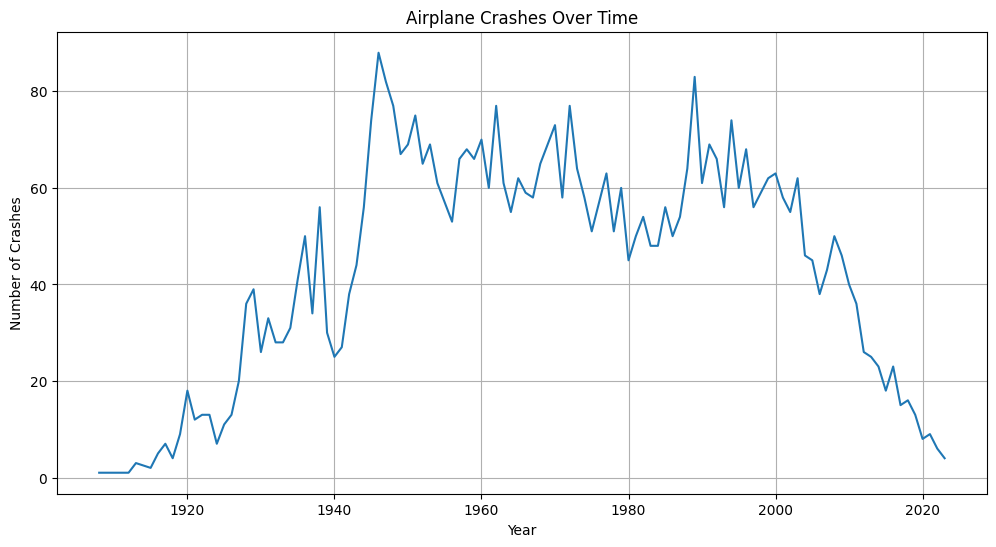

In [ ]:

# Calculate basic statistics
total_crashes = len(df)
total_fatalities = df['Fatalities'].sum()
survival_rate = 1 - (total_fatalities / df['Aboard'].sum())

print(f"Total Crashes: {total_crashes}")
print(f"Total Fatalities: {total_fatalities}")
print(f"Survival Rate: {survival_rate:.2%}")

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Analyze crash frequency over time
# Create a time series of crashes per year
crashes_per_year = df.groupby(df['Date'].dt.year)['Date'].count()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Airplane Crashes Over Time')
plt.grid(True)
plt.show()





In [11]:
import scipy.stats as stats

# Calculate mean, median, and standard deviation of fatalities
fatality_mean = stats.tmean(df['Fatalities'])
fatality_median = df['Fatalities'].median()
fatality_std = stats.tstd(df['Fatalities'])

print(f"Mean Fatalities: {fatality_mean:.2f}")
print(f"Median Fatalities: {fatality_median:.2f}")
print(f"Standard Deviation of Fatalities: {fatality_std:.2f}")

# Example hypothesis test: Compare average fatalities in two decades (e.g., 1960s vs. 2010s)
decade_1960s = df[(df['Date'].dt.year >= 1960) & (df['Date'].dt.year < 1970)]
decade_2010s = df[(df['Date'].dt.year >= 2010) & (df['Date'].dt.year < 2020)]

t_statistic, p_value = stats.ttest_ind(decade_1960s['Fatalities'], decade_2010s['Fatalities'])

print(f"\nT-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a statistically significant difference in average fatalities between the 1960s and 2010s.")
else:
    print("There is no statistically significant difference in average fatalities between the 1960s and 2010s.")



Mean Fatalities: 22.36
Median Fatalities: 11.00
Standard Deviation of Fatalities: 35.04

T-statistic: -0.28
P-value: 0.779
There is no statistically significant difference in average fatalities between the 1960s and 2010s.


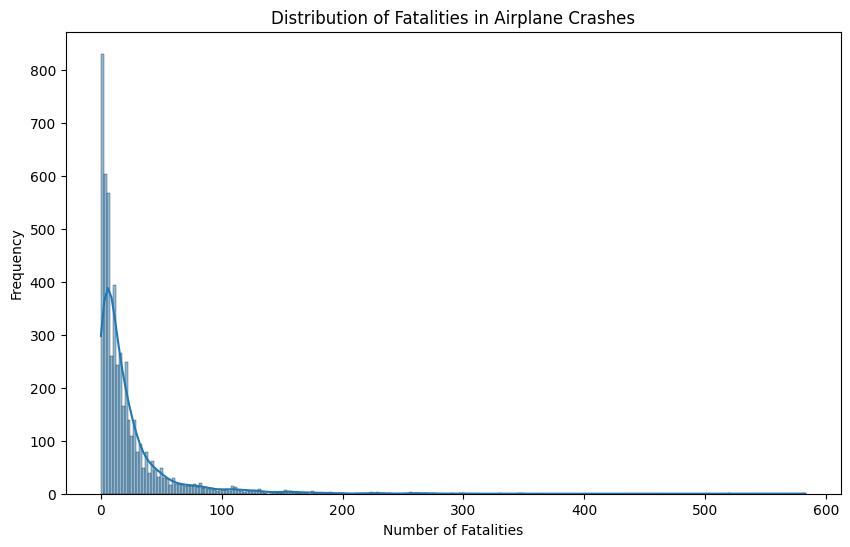

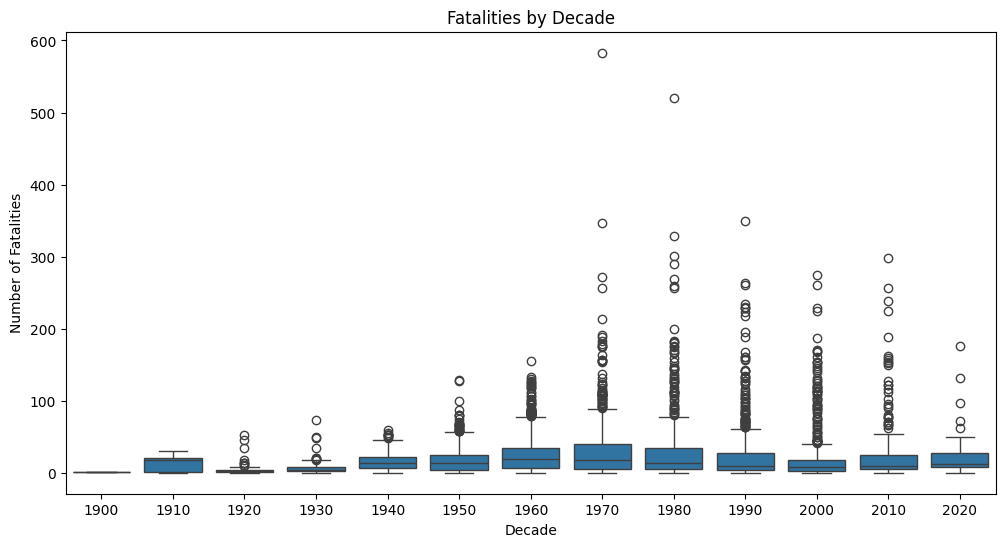

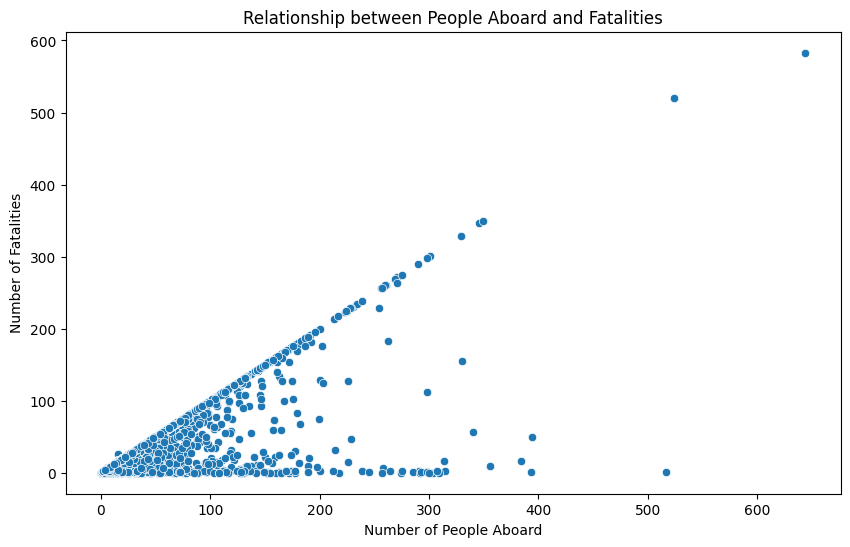

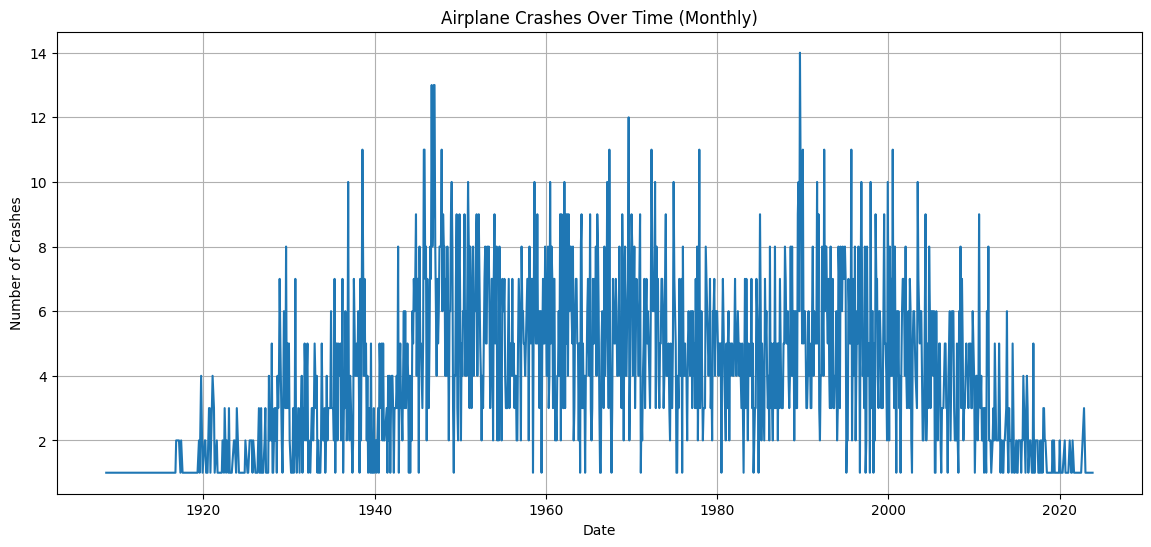

In [16]:
# Visualizations using Matplotlib and Seaborn

# Histogram of Fatalities
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], kde=True)
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.show()


# Box plot of fatalities by decade
df['Decade'] = (df['Date'].dt.year // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='Fatalities', data=df)
plt.xlabel('Decade')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Decade')
plt.show()


# Scatter plot of Aboard vs. Fatalities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aboard', y='Fatalities', data=df)
plt.xlabel('Number of People Aboard')
plt.ylabel('Number of Fatalities')
plt.title('Relationship between People Aboard and Fatalities')
plt.show()

# Time series plot of crashes per month (more granular than per year)
crashes_per_month = df.groupby(df['Date'].dt.to_period('M'))['Date'].count()
plt.figure(figsize=(14, 6))
plt.plot(crashes_per_month.index.to_timestamp(), crashes_per_month.values)
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.title('Airplane Crashes Over Time (Monthly)')
plt.grid(True)
plt.show()